<a href="https://colab.research.google.com/github/antunesbaa/ant_data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando Dados do AirBnb - Santiago / Chile**

O Airbnb é uma plataforma online que possibilita o aluguel de casas e quartos para viajantes ao redor do mundo. Desde sua fundação em 2008, tornou-se uma das maiores plataformas de compartilhamento de hospedagem, com mais de 7 milhões de listagens em 220 países. 

Os usuários podem pesquisar e reservar acomodações por meio do site ou aplicativo do Airbnb, que oferece opções desde apartamentos simples até castelos extravagantes, além de experiências personalizadas oferecidas pelos anfitriões. Em 2021, o Airbnb divulgou ter mais de 4 milhões de anfitriões em todo o mundo e ter hospedado mais de 900 milhões de hóspedes desde sua criação. 

A plataforma é uma opção popular para viajantes que buscam hospedagens mais econômicas e autênticas, enquanto oferece a oportunidade para anfitriões ganharem dinheiro extra alugando seus espaços. Embora tenha enfrentado algumas controvérsias em relação a regulamentações de hospedagem e problemas de segurança, o Airbnb continua a crescer e expandir sua oferta de serviços. 

Além disso, a plataforma oferece acesso limitado a dados abertos de propriedades e reservas por meio da plataforma "Inside Airbnb".

##### **Neste Notebook, faremos uma análise dos dados da cidade de Santiago do Chile e exploraremos quais informações podem ser extraídas desses dados**.

## Obtenção dos Dados

Os dados utilizados neste Notebook foram extraídos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

A análise exploratória dos dados será feita por meio do arquivo:
* `listinings.csv` - Summary information and metrics for listings in Santiago (good for visualisations).

`Ìmportante`: O portal está em constante desenvolvimento, e em algum momento futuro, é possível que o conjunto de dados específico utilizado neste notebook não esteja mais acessível, o que pode causar falhas no nosso código.
Sendo assim, para que você sempre consiga utilizar esses dados, eles ficaram disponíveis [Aqui](https://drive.google.com/file/d/1O0MF1nrUBdh3dfEh0rXru7YAZrQYio06/view).

Vamos ao Projeto.


In [ ]:
# importar os pacotes necessarios
## Obtenção dos Dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MEUS PROJETOS/PROJETO 1 - ANALISANDO DADOS DO AIRBNB/listings.csv')


## Análise dos Dados

O objetivo desta fase é gerar uma compreensão inicial da situação e adquirir um entendimento de como os dados estão organizados.

**Dicionário das variáveis**

* `id`: Número de identificação único para cada listagem no Airbnb.
*  `host_id`: Número de identificação único do host (anfitrião) que está listando a propriedade.
* `host_name`: Nome do host (anfitrião) que está listando a propriedade.
* `neighbourhood_group`: Área geográfica mais ampla onde a propriedade está localizada. 
* `neighbourhood`: Bairro onde a propriedade está localizada.
* `latitude`: Coordenada de latitude da localização da propriedade.
* `longitude`: Coordenada de longitude da localização da propriedade.
* `room_type`: O tipo de acomodação que está sendo anunciada (por exemplo, apartamento inteiro, quarto privado, quarto compartilhado, etc.).
* `price`: O preço cobrado pela propriedade anunciada.
* `minimum_nights`: O número mínimo de noites que um hóspede deve reservar para ficar na propriedade.
* `number_of_reviews`: O número total de avaliações que a propriedade recebeu de hóspedes anteriores.
* `last_review`: A data da última avaliação deixada por um hóspede.
* `reviews_per_month`: A taxa média de revisão deixada por mês.
* `calculated_host_listings_count`: O número de propriedades que o host (anfitrião) está listando na plataforma.
* `availability_365`: O número de dias que a propriedade está disponível para reserva durante o próximo ano.
* `number_of_reviews_ltm`: O número total de avaliações que a propriedade recebeu durante o último trimestre.
* `license`: Informação sobre a licença de funcionamento da propriedade, se aplicável. 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45796,3,0,NaN,NaN,1,178,0,NaN
1,559852,Deluxe 2 Bedrooms Apartment,2752180,Marcos,NaN,Providencia,-33.42649,-70.61571,Entire home/apt,95049,2,12,2019-07-14,0.13,7,362,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46660,1,46,2021-11-04,0.31,3,89,0,NaN
3,1854958,2do piso casa en Las Condes,9682413,Felipe,NaN,Las Condes,-33.40346,-70.54718,Private room,43204,1,0,NaN,NaN,1,365,0,NaN
4,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.48,1,182,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora vamos verificar quantas linhas (entradas) e quantas colunas  (variáveis) nosso conjunto de dados possui. 

In [7]:
# identificar o volume de dados do DataFrame
print('Entradas: {}' .format(df.shape[0]))
print('Variaveis: {}\n' .format(df.shape[1]))

# verificar os tipos de cada coluna do dataset
df.dtypes

Entradas: 9128
Variaveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante observar logo no inicio da análise a qualidade do dataset, por meio dos valores ausentes. É interessante entendermos se a quantidade de valores ausentes são significativos em relaçao ao número total de dados. 

* É possível verificar que na coluna `neighbourhood_group` e `license` possuem 100% e 98% dos seus valores faltantes.

* As colunas `reviews_per_month`e `last_review`possuem 1/4 dos seus valores faltantes.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.974474
reviews_per_month                 0.248028
last_review                       0.248028
name                              0.000329
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para isso, irei plotar o histograsma.

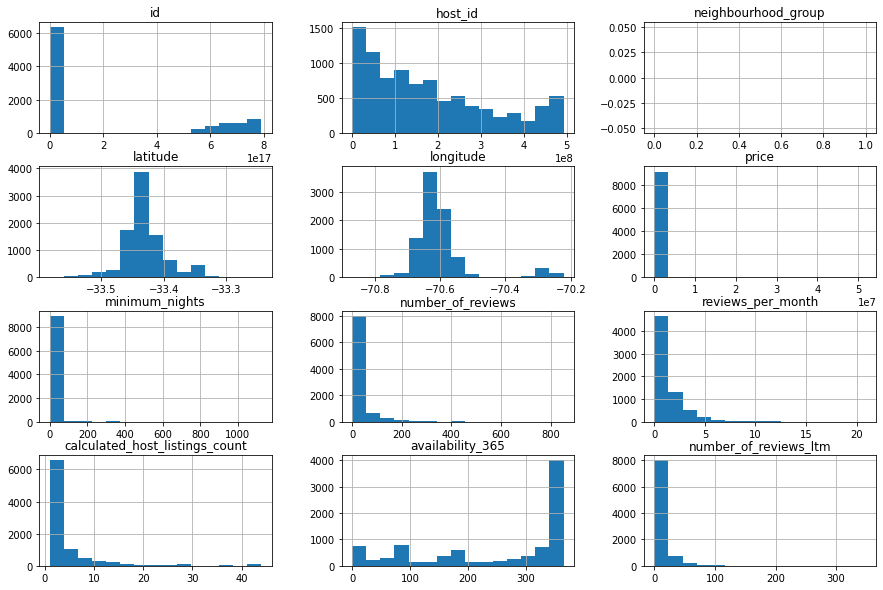

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há Outliers presentes?**

Verificando a distribuição do Histograma, os valores que não seguem uma distribuição e distorcem toda a representação gráfica indicam a presença de outliers, como é o caso das variáveis `price`, e `minimum_nights`.
Existem duas formas rṕapidas para confirmarmos isso:

* Resumo estatístico: discribe()
* Plotar boxplots para a variável.



In [10]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe() 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.128000e+03,9128.000000,9128.000000,6864.000000,9128.000000,9128.000000
mean,1.016054e+05,7.283852,24.123466,1.293756,4.104733,249.527388
std,9.914056e+05,31.521523,49.084561,1.568765,6.603516,129.508072
min,6.830000e+03,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.971400e+04,1.000000,1.000000,0.250000,1.000000,140.750000
50%,4.285700e+04,2.000000,5.000000,0.750000,1.000000,326.000000
75%,6.671400e+04,3.000000,24.000000,1.790000,4.000000,362.000000
max,5.184489e+07,1124.000000,852.000000,20.900000,44.000000,365.000000


Reparem que a coluna `price`apresentou uma notação científica ou exponencial. Nesse caso teremos que usar o método "set_option" do pandas fazer com que deixe de exibir a notação. Depois veremos o resuno estatístico novamente.

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9128.00,9128.00,9128.00,6864.00,9128.00,9128.00
mean,101605.41,7.28,24.12,1.29,4.10,249.53
std,991405.56,31.52,49.08,1.57,6.60,129.51
min,6830.00,1.00,0.00,0.01,1.00,0.00
25%,29714.00,1.00,1.00,0.25,1.00,140.75
50%,42857.00,2.00,5.00,0.75,1.00,326.00
75%,66714.00,3.00,24.00,1.79,4.00,362.00
max,51844886.00,1124.00,852.00,20.90,44.00,365.00


Analisando o resumo estatístico, observamos que a variável `price`apresenta 75% do valor abaixo de 66714, porém seu valor máximo é 51844886.

Na coluna `minimum_nights` a quantidade máxima de noites está em 1124 dias.

#### **tratando a variável`price` e `minimum_nights`pelo método estatístico IQE**.

O IQR (Interquartile Range) é uma medida de dispersão estatística que representa a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de um conjunto de dados. O IQR é usado para identificar valores extremos em um conjunto de dados e é uma técnica comum para tratamento de outliers.

O tratamento de variáveis pelo método IQR envolve a detecção e remoção de outliers em um conjunto de dados usando o IQR. O método IQR considera como outliers os valores que estão a mais de 1,5 vezes o IQR acima do terceiro quartil ou abaixo do primeiro quartil.

In [12]:
#Identificando os outliers para variavel price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variavel price:', IQR_price )

#Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price:', sup_price)
print('Limite inferior de price:', inf_price)



IQR da variavel price: 37000.0
Limite superior de price: 122214.0
Limite inferior de price: -25786.0


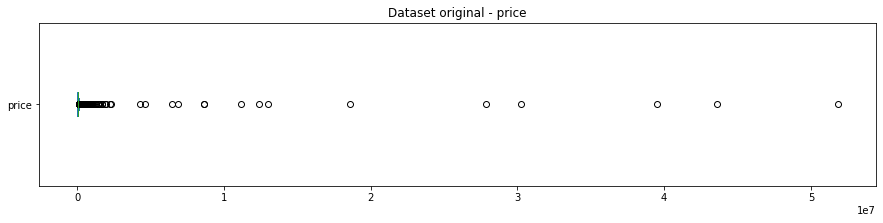

O dataset possui 9128 colunas
925 Entradas acima de 122214.0
Representam 10.13% do dataset


In [13]:
#Verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind = 'box', vert=False);
ax.set_title('Dataset original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 122214.0".format(len(df[df.price > 122214.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 122214.0]) / df.shape[0])*100))
     

In [14]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


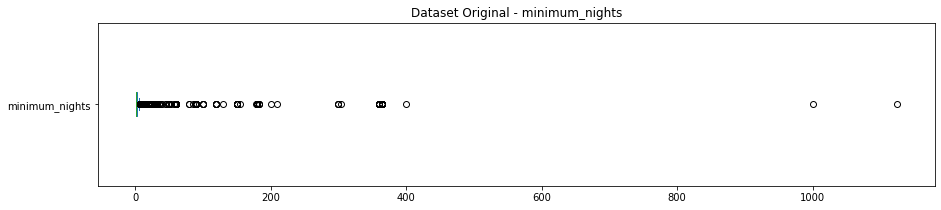

O dataset possui 9128 colunas
1244 Entradas acima de 122214.0
Representam 13.63% do dataset


In [15]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 122214.0".format(len(df[df.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 6.0]) / df.shape[0])*100))

In [16]:
#limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 122214.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 7].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)
     

Shape antes da limpeza:  (9128, 18)
Shape após a limpeza:  (7396, 18)


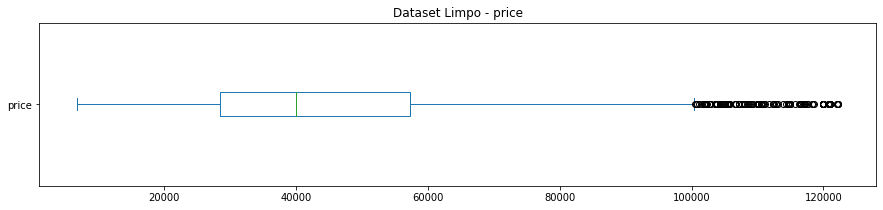

Tamanho original: 9128 
Tamanho atual: 7396 


In [17]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} ".format(df.shape[0]))
print("Tamanho atual: {} ".format(df_clean.shape[0]))

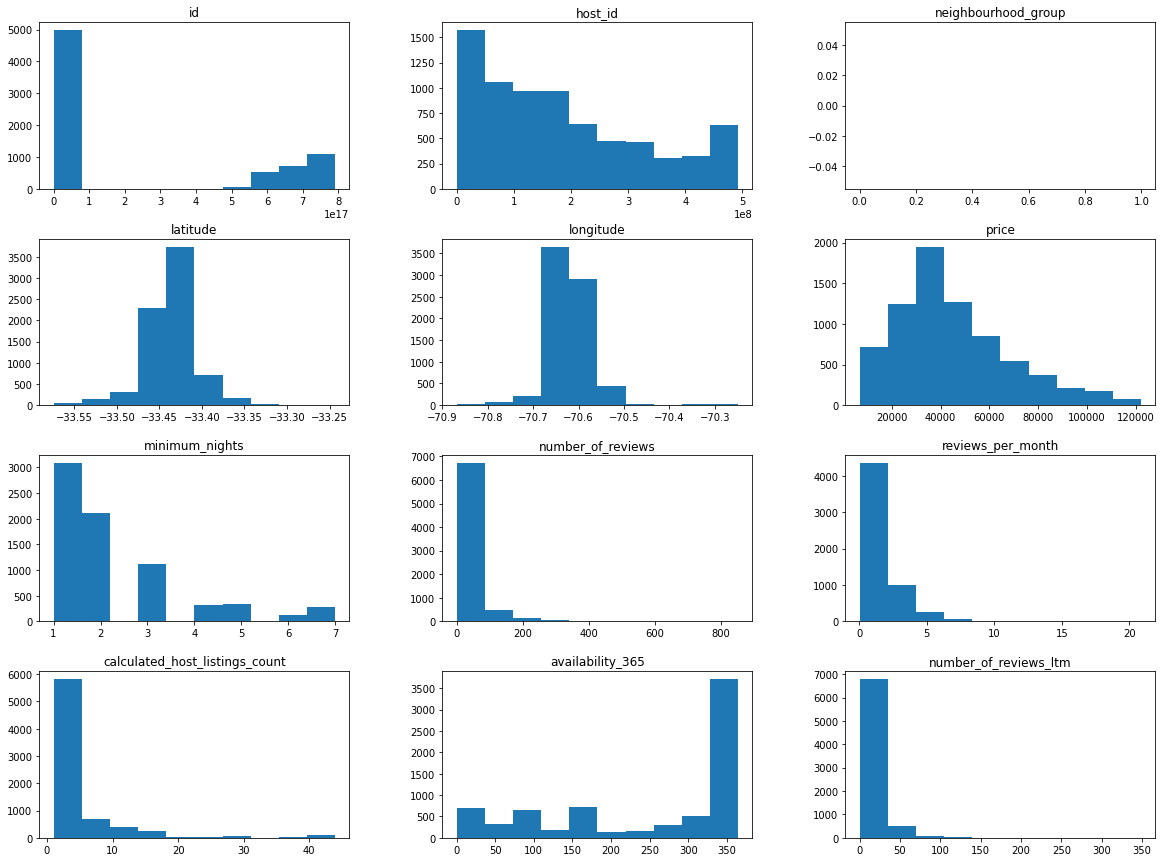

In [18]:
# verificando as distribuições limpas
df_clean.hist(figsize=(20,15), grid=False);
     

In [19]:
# analisando o resumo estatístico limpo
df_clean.describe().round(1)

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7396.00,7396.00,0.00,7396.00,7396.00,7396.00,7396.00,7396.00,5721.00,7396.00,7396.00,7396.00
mean,225069048866107008.00,183625268.30,NaN,-33.40,-70.60,45017.10,2.20,27.00,1.50,4.30,251.40,10.20
std,325582175028837184.00,144961570.10,NaN,0.00,0.00,23097.20,1.50,52.80,1.70,6.80,129.10,17.40
min,49392.00,30509.00,NaN,-33.60,-70.90,6830.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,23684873.20,58328836.50,NaN,-33.40,-70.60,28547.50,1.00,1.00,0.30,1.00,145.00,0.00
50%,41707584.00,152758429.00,NaN,-33.40,-70.60,40000.00,2.00,6.00,1.00,1.00,329.00,3.00
75%,629024531280396544.00,280536365.00,NaN,-33.40,-70.60,57310.20,3.00,28.00,2.00,5.00,362.00,13.00
max,791556310640919424.00,492840994.00,NaN,-33.20,-70.20,122207.00,7.00,852.00,20.90,44.00,365.00,349.00


### **Q6. Qual a correlação existente entre as variáveis**

A correlação é uma medida estatística que indica a relação entre duas variáveis. Pode ser uma correlação positiva, ou negativa. No nosso contexto, buscamos semelhanças entra as variáveis.

A correlação pode ser mensurada, e depende do ceficiente de correlação para estabelecer sua intensidade.

Para identificar as correlações entre as variáveis de interesse, vamos:

*Criar uma matriz de correlação
*Criar um heatmap a partir dessa matriz, usando a biblioteca `**siaborn**`

In [20]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.00,0.02,-0.01,-0.00,0.20,0.09
minimum_nights,0.02,1.00,-0.04,-0.23,-0.20,-0.14
number_of_reviews,-0.01,-0.04,1.00,0.52,0.03,-0.05
reviews_per_month,-0.00,-0.23,0.52,1.00,0.05,0.12
calculated_host_listings_count,0.20,-0.20,0.03,0.05,1.00,0.05
availability_365,0.09,-0.14,-0.05,0.12,0.05,1.00


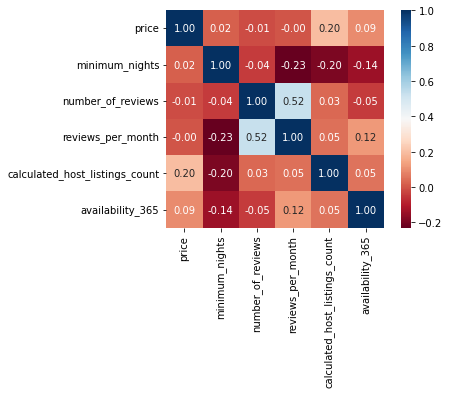

In [21]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Não foi observado nenhuma correlação forte entre as variáveis analisadas.

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável room_type indica o tipo de acomodação que está sendo anunciada (por exemplo, apartamento inteiro, quarto privado, quarto compartilhado, etc.)

Vamos contabilizar a quantidde de ocorreências de cada tipo de aluguel, por meio do método `value_counts()`

In [22]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4663
Private room       2573
Shared room         116
Hotel room           44
Name: room_type, dtype: int64

In [23]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt   0.63
Private room      0.35
Shared room       0.02
Hotel room        0.01
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**
Estamos querendo fazer a comparação de um variável em função da outra. Nesse caso, vamos comparar bairros (neighbourhood) a partir do preço de locação (price). Para isso, usaremos a função `groupby()`. 


In [24]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Espejo      91890.00
Lo Barnechea   70435.13
Vitacura       62143.84
Las Condes     58220.75
Providencia    48658.55
Pudahuel       46817.16
Huechuraba     43333.39
La Florida     42720.05
San Miguel     39853.40
Santiago       39415.92
Name: price, dtype: float64

In [25]:
#Analisando a quantidade de entradas por bairro
df_clean.neighbourhood.value_counts()
     

Santiago               2684
Providencia            1547
Las Condes             1243
Ñuñoa                   521
Vitacura                210
Recoleta                179
Estación Central        126
Lo Barnechea            119
San Miguel              113
La Florida               84
Macul                    79
La Reina                 78
Maipú                    68
Peñalolén                56
Pudahuel                 51
Independencia            38
San Joaquín              38
La Cisterna              37
Huechuraba               33
Quinta Normal            27
Quilicura                19
Renca                    12
Cerrillos                 7
Pedro Aguirre Cerda       6
El Bosque                 5
Lo Prado                  4
La Granja                 4
Conchalí                  4
Cerro Navia               2
Lo Espejo                 1
San Ramón                 1
Name: neighbourhood, dtype: int64

Ao avaliar os dados acima, constatamos que os bairros Lo Espejo apresenta uma média elevada de valor, entretanto com um número reduzido de registros, conforme evidenciado acima. Diante dessa situação, optaremos por excluir esse bairro da análise, devido à sua baixa representatividade.





## **Q9. plotar os imóveis pela latitude-longitude**


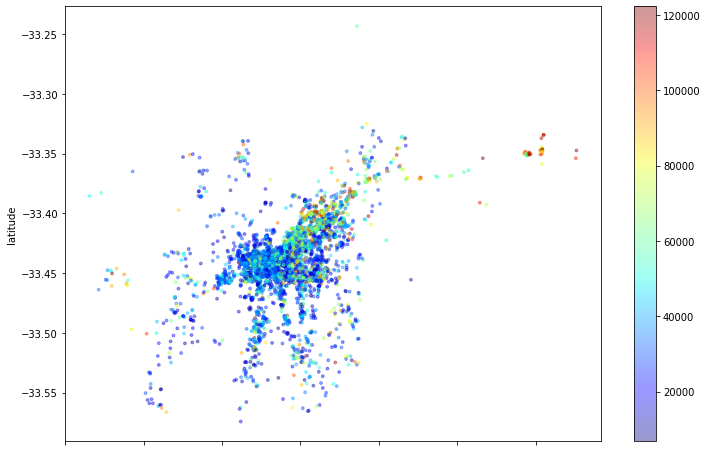

In [26]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Realizamos uma análise cuidadosa dos dados resumidos do Airbnb e concluímos que é fundamental considerar essas informações antes de alugar um imóvel para viagem. Através dessa análise foi possível obter diversos dados valiosos.

Verificamos que há valores atípicos em algumas das variáveis e, caso não sejam devidamente tratados, podem comprometer os resultados da análise.

Falando agora de maneira mais direta, se você está planejando uma viagem para Santiago, saiba que cerca de 75% dos visitantes ficam na cidade por pelo menos três noites. A nossa recomendação é se hospedar em Providencia, que fica próximo aos principais pontos turísticos e tem fácil acesso por meio do metrô. Além disso, é possível encontrar uma grande variedade de imóveis para locação na região, com um preço médio de 45017,10 pesos chilenos, equivalente a R$287,36 na cotação atual.